References
----------
[1] https://openstax.org/books/calculus-volume-1/pages/3-7-derivatives-of-inverse-functions
    
[2] Checkpoint 3.42
$$
\begin{equation}
g(x)=\frac{1}{x+2}
\end{equation}
$$

SymPy version: 1.13.2
NumPy version: 1.26.4
Matplotlib version: 3.9.2

Lambda(x, 1/(x + 2))
x:[-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
  2.   2.5  3.   3.5  4.   4.5  5. ]
y:[-0.333333333333333, -0.400000000000000, -0.500000000000000, -0.666666666666667, -1.00000000000000, -2.00000000000000, inf, 2.00000000000000, 1.00000000000000, 0.666666666666667, 0.500000000000000, 0.400000000000000, 0.333333333333333, 0.285714285714286, 0.250000000000000, 0.222222222222222, 0.200000000000000, 0.181818181818182, 0.166666666666667, 0.153846153846154, 0.142857142857143]
f′(x)=-1/(x + 2)**2
f′(2)=-0.0625000000000000
y_tangent:[0.687500000000000 0.656250000000000 0.625000000000000 0.593750000000000
 0.562500000000000 0.531250000000000 0.500000000000000 0.468750000000000
 0.437500000000000 0.406250000000000 0.375000000000000 0.343750000000000
 0.312500000000000 0.281250000000000 0.250000000000000 0.218750000000000
 0.187500000000000 0.156250000000000 0.125000000000000 0.093

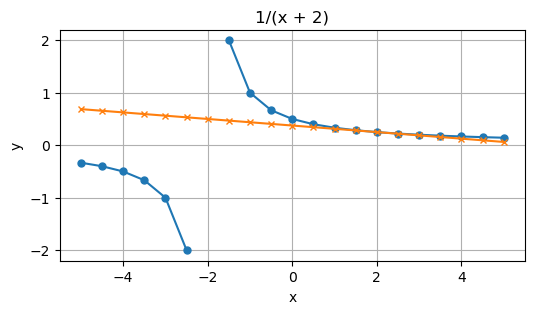

In [1]:
import sympy as sp
from sympy.abc import x
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

print(f"SymPy version: {sp.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print()

f = sp.Lambda(x, 1 / (x + 2))
print(f)

x_values = np.linspace(-5, 5, 21)
print(f"x:{x_values}")


def map_x_values(x_value):
    result = f(x_value)
    if result == sp.zoo:
        return np.inf
    return result


y_values = list(map(map_x_values, x_values))
print(f"y:{y_values}")

f_prime = sp.diff(f(x), x)
print(f"f′(x)={f_prime.simplify()}")

x_at = 2


def calculate_slope(derivative_fn, derivative_order=1):
    slope = derivative_fn.subs(x, x_at).evalf()
    apostrophe = "′" * derivative_order
    print(f"f{apostrophe}({x_at})={slope}")
    y_tangent = slope * (x_values - x_at) + f(x_at).evalf()
    print(f"y_tangent:{y_tangent}")
    return slope, y_tangent


slope, y_tangent = calculate_slope(f_prime)

figure, axes = plt.subplots(figsize=(6, 3))
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_title(f.expr)
axes.grid()
axes.plot(x_values, y_values, marker="o", markersize=5, label="f′")
axes.plot(x_values, y_tangent, marker="x", markersize=5, label="f′′")
plt.show()